In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

In [2]:
usage_data_23 = pd.read_csv('electricity.csv', header=1, index_col=0).T
usage_data_1mc = pd.read_csv('1MC2024.csv', header=1, index_col=0).T
usage_data_arda = pd.read_csv('Ardamine 2024.csv', header=1, index_col=0).T
import_export_data_1mc = pd.read_csv('HDF_calckWh_10000826638_26-02-2025.csv')
import_export_data_23 = pd.read_csv('HDF_calckWh_10000847339_26-02-2025.csv')


In [ ]:
pd.options.mode.copy_on_write = True

usage_data_23_day = usage_data_23.sum().reset_index()
usage_data_1mc_day = usage_data_1mc.sum().reset_index()
usage_data_arda_day = usage_data_arda.sum().reset_index()

usage_data_23_day['Date'] = mdates.num2date(mdates.date2num(usage_data_23_day['Date']))
usage_data_1mc_day['Date'] = mdates.num2date(mdates.date2num(usage_data_1mc_day['Date']))
usage_data_arda_day['Date'] = mdates.num2date(mdates.date2num(usage_data_arda_day['Date']))

usage_data_23_month_avg = usage_data_23_day.groupby(pd.Grouper(key='Date', freq='1MS')).mean().reset_index()
usage_data_1mc_month_avg = usage_data_1mc_day.groupby(pd.Grouper(key='Date', freq='1MS')).mean().reset_index()
usage_data_arda_month_avg = usage_data_arda_day.groupby(pd.Grouper(key='Date', freq='1MS')).mean().reset_index()

import_export_data_1mc['Date'] = pd.to_datetime(import_export_data_1mc['Read Date and End Time'], dayfirst=True)
import_export_data_1mc_day = import_export_data_1mc.groupby(['Read Type',pd.Grouper(key='Date', freq='1D')]).sum().reset_index()
export_data_1mc = import_export_data_1mc_day[import_export_data_1mc_day['Read Type'] == 'Active Export Interval (kWh)']
export_data_1mc_day = export_data_1mc.groupby(['Read Type',pd.Grouper(key='Date', freq='1D')]).sum().reset_index()
export_data_1mc_month_avg = export_data_1mc_day.loc[:,['Date','Read Value']].groupby([pd.Grouper(key='Date', freq='1MS')]).mean().reset_index()

import_export_data_23['Date'] = pd.to_datetime(import_export_data_23['Read Date and End Time'], dayfirst=True)
export_data_23 = import_export_data_23[import_export_data_23['Read Type'] == 'Active Export Interval (kWh)']
export_data_23_day = export_data_23.groupby(['Read Type',pd.Grouper(key='Date', freq='1D')]).sum().reset_index()
export_data_23_month = export_data_23.groupby([pd.Grouper(key='Date', freq='1MS')]).sum().reset_index()
export_data_23_month_avg = export_data_23_day.loc[:,['Date','Read Value']].groupby([pd.Grouper(key='Date', freq='1MS')]).mean().reset_index()




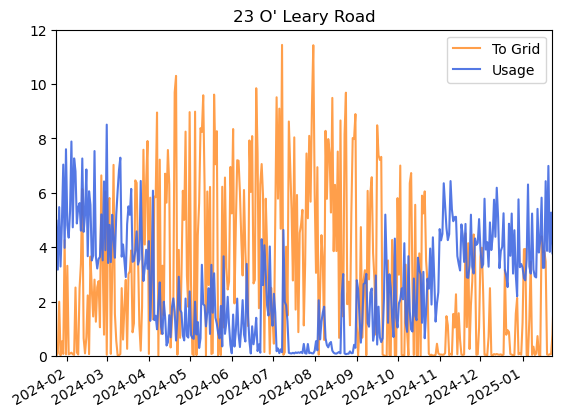

In [121]:
fig, ax = plt.subplots()
months = mdates.MonthLocator()

ax.plot(export_data_23_day['Date'], export_data_23_day['Read Value'], label='To Grid', color='tab:orange', alpha=0.75)
ax.plot(usage_data_23_day['Date'], usage_data_23_day[0], label='Usage', color='royalblue', alpha=0.9)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
plt.title('23 O\' Leary Road')
plt.gca().set_xbound(datetime.date(2024, 1, 24),datetime.date(2025, 1, 23))
plt.gca().set_ybound(0,12)
plt.legend()
plt.show()

# https://matplotlib.org/2.0.2/examples/api/date_demo.html

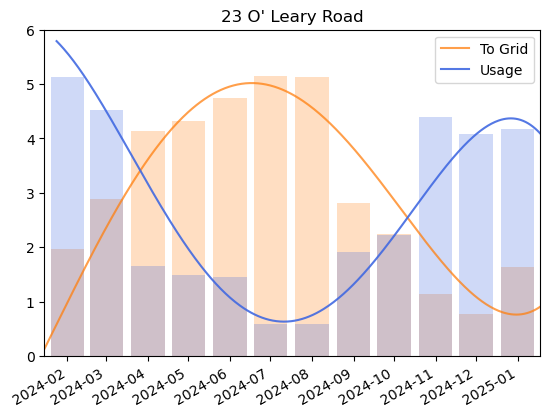

In [149]:
fig, ax = plt.subplots()
months = mdates.MonthLocator()

x1 = export_data_23_day['Date']
xd1 = mdates.date2num(x1)
y1 = export_data_23_day['Read Value']
x2 = usage_data_23_day['Date']
xd2 = mdates.date2num(x2)
y2 = usage_data_23_day[0]

x3 = export_data_23_month['Date']
y3 = export_data_23_month_avg['Read Value']
x4 = usage_data_23_month_avg['Date']
y4 = usage_data_23_month_avg[0]

p1 = np.poly1d(np.polyfit(xd1, y1, 4))
p2 = np.poly1d(np.polyfit(xd2, y2, 4))
xp1 = np.linspace(xd1.min(), xd1.max(), 406)
xp2 = np.linspace(xd2.min(), xd2.max(), 406)

dd1 = mdates.num2date(xp1)
dd2 = mdates.num2date(xp2)


# ax.plot(x1, y1, label='To Grid', color='tab:orange', alpha=0.75)
ax.plot(dd1, p1(xp1), label='To Grid', color='tab:orange', alpha=0.75)
plt.bar(x3,y3, width=25, alpha=0.25, color='tab:orange')
# ax.plot(x2, y2, label='Usage', color='royalblue', alpha=0.9)
ax.plot(dd2, p2(xp2), label='Usage', color='royalblue', alpha=0.9)
plt.bar(x4,y4, width=25, alpha=0.25, color='royalblue')
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
plt.title('23 O\' Leary Road')
plt.gca().set_xbound(datetime.date(2024, 1, 15),datetime.date(2025, 1, 18))
plt.gca().set_ybound(0,6)
plt.legend()
plt.show()

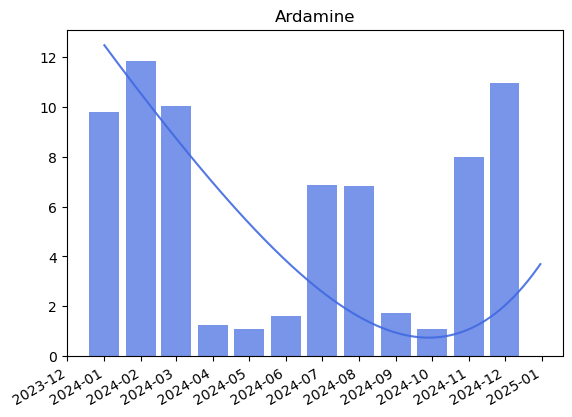

In [144]:
x = usage_data_arda_day['Date']
y = usage_data_arda_day[0]

x1 = usage_data_arda_day['Date']
xd1 = mdates.date2num(x1)
y1 = usage_data_arda_day[0]

x2 = usage_data_arda_month_avg['Date']
y2 = usage_data_arda_month_avg[0]

p1 = np.poly1d(np.polyfit(xd1, y1, 4))
xp1 = np.linspace(xd1.min(), xd1.max(), 366)

dd1 = mdates.num2date(xd1)

fig, ax = plt.subplots()
months = mdates.MonthLocator()
# ax.plot(x,y)
ax.plot(dd1, p2(xp1), label='Usage', color='royalblue', alpha=0.9)
ax.bar(x2,y2, width=25, color='royalblue', alpha=0.7)
# ax.xaxis_date()
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
plt.title('Ardamine')
plt.show()

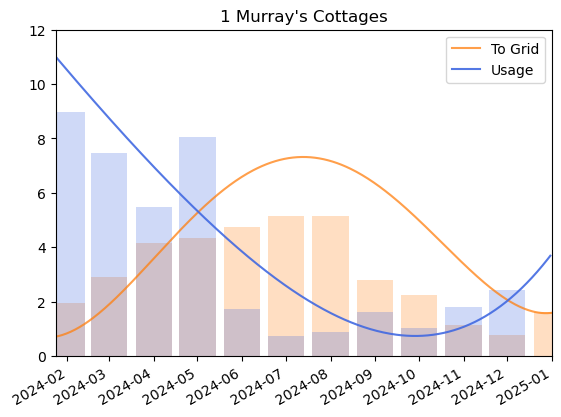

In [ ]:
fig, ax = plt.subplots()
months = mdates.MonthLocator()

x1 = export_data_1mc['Date']
y1 = export_data_1mc['Read Value']
x2 = usage_data_1mc_day['Date']
y2 = usage_data_1mc_day[0]
x3 = export_data_23_month_avg['Date']
y3 = export_data_23_month_avg['Read Value']
x4 = usage_data_1mc_month_avg['Date']
y4 = usage_data_1mc_month_avg[0]

xd1 = mdates.date2num(x1)
xd2 = mdates.date2num(x2)

p1 = np.poly1d(np.polyfit(xd1, y1, 4))
p2 = np.poly1d(np.polyfit(xd2, y2, 4))
xp1 = np.linspace(xd1.min(), xd1.max(), 406)
xp2 = np.linspace(xd2.min(), xd2.max(), 406)

dd1 = mdates.num2date(xp1)
dd2 = mdates.num2date(xp2)


# ax.plot(x1, y1, label='To Grid', color='tab:orange', alpha=0.75)
ax.plot(dd1, p1(xp1), label='To Grid', color='tab:orange', alpha=0.75)
plt.bar(x3,y3, width=25, alpha=0.25, color='tab:orange')
# ax.plot(x2, y2, label='Usage', color='royalblue', alpha=0.9)
ax.plot(dd2, p2(xp2), label='Usage', color='royalblue', alpha=0.9)
plt.bar(x4,y4, width=25, alpha=0.25, color='royalblue')

ax.plot()

ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
plt.title('1 Murray\'s Cottages')
plt.gca().set_xbound(datetime.date(2024, 1, 24),datetime.date(2025, 1, 1))
plt.gca().set_ybound(0,12)
plt.legend()
plt.show()